# CodSoft | Data Science | Internship

---
## Problem Statement
## Task 1 | TITANIC SURVIVAL PREDICTION

   - Use the Titanic dataset to build a model that predicts whether a
    passenger on the Titanic survived or not. This is a classic beginner
    project with readily available data.
    
   - The dataset typically used for this project contains information
    about individual passengers, such as their age, gender, ticket
    class, fare, cabin, and whether or not they survived.


### **Import necessary libraries**

In [215]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### **Load the Titanic dataset**

In [216]:
fd = pd.read_csv("titanic.csv")

In [217]:
fd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [218]:
fd.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [219]:
fd.shape

(418, 12)

In [220]:
fd.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [221]:
fd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### **Data Exploration and Analysis**
 - **Let's start with some data exploration and visualization.**

### **Plot the count of survivors**

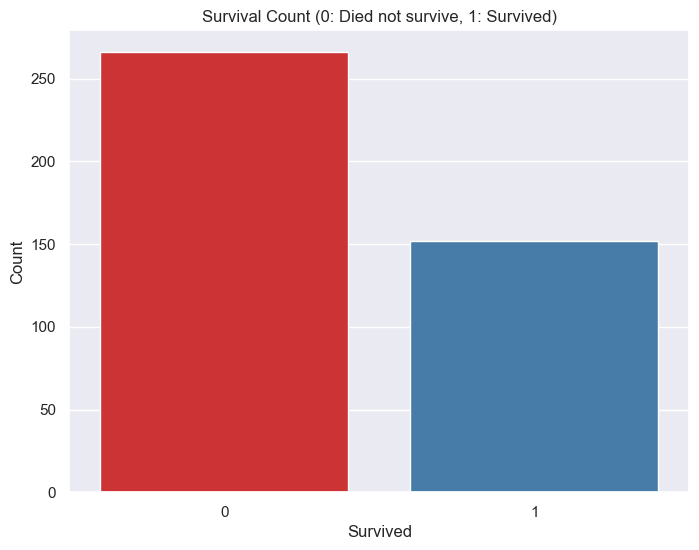

In [222]:
# Plot the count of survivors
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(data=fd, x='Survived', palette='Set1')
plt.title('Survival Count (0: Died not survive, 1: Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

### **Age distribution of passengers**

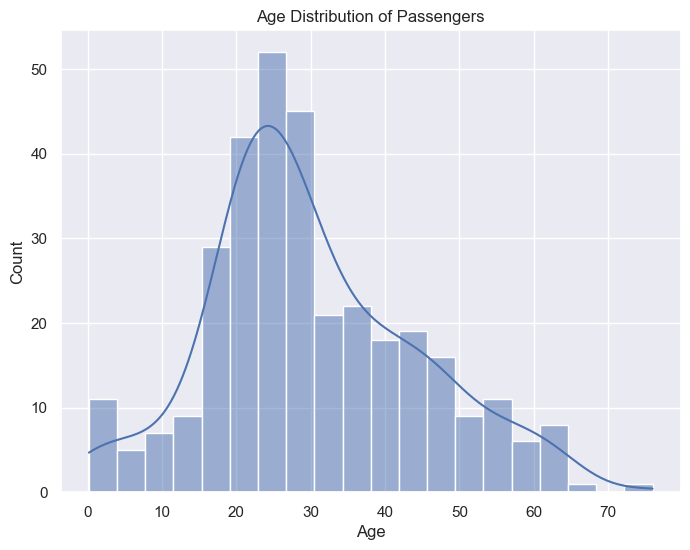

In [223]:
# Age distribution of passengers
plt.figure(figsize=(8, 6))
sns.histplot(data=fd, x='Age', bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### **Gender distribution of passengers**

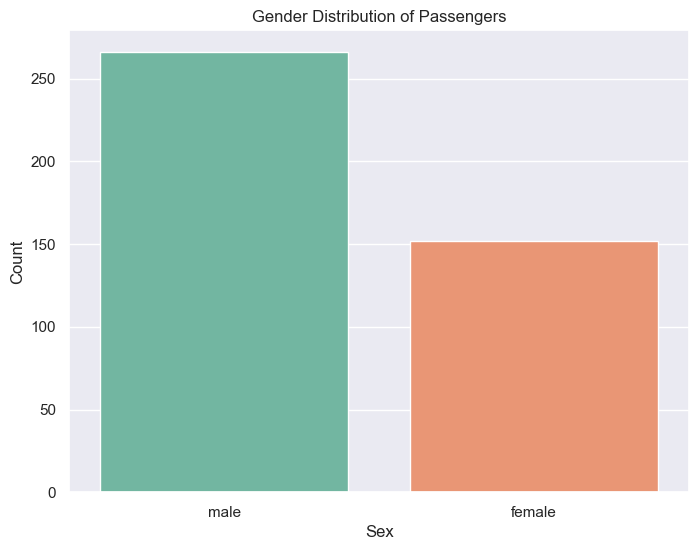

In [224]:
# Gender distribution of passengers
plt.figure(figsize=(8, 6))
sns.countplot(data=fd, x='Sex', palette='Set2')
plt.title('Gender Distribution of Passengers')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### **Fare distribution of passengers**

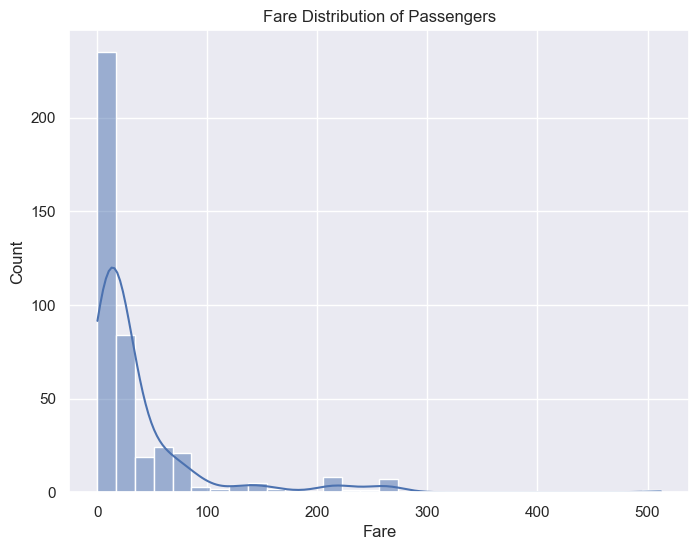

In [225]:
# Fare distribution of passengers
plt.figure(figsize=(8, 6))
sns.histplot(data=fd, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution of Passengers')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

### **Pclass distribution of passengers**

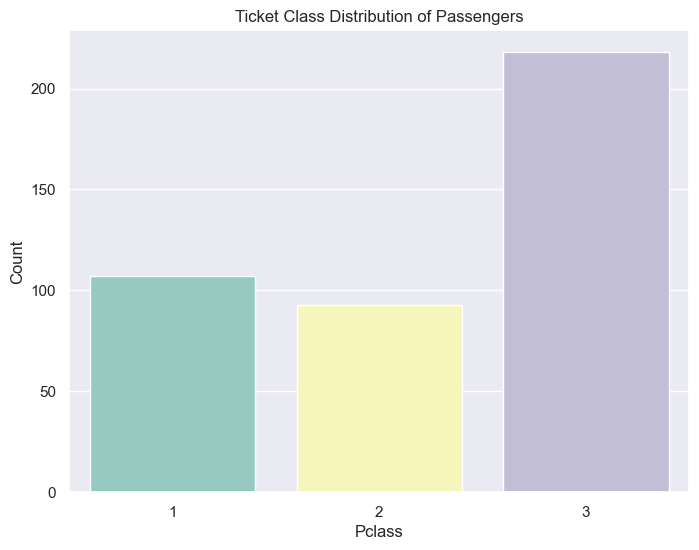

In [226]:
# Pclass distribution of passengers
plt.figure(figsize=(8, 6))
sns.countplot(data=fd, x='Pclass', palette='Set3')
plt.title('Ticket Class Distribution of Passengers')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

### **Relational plots**

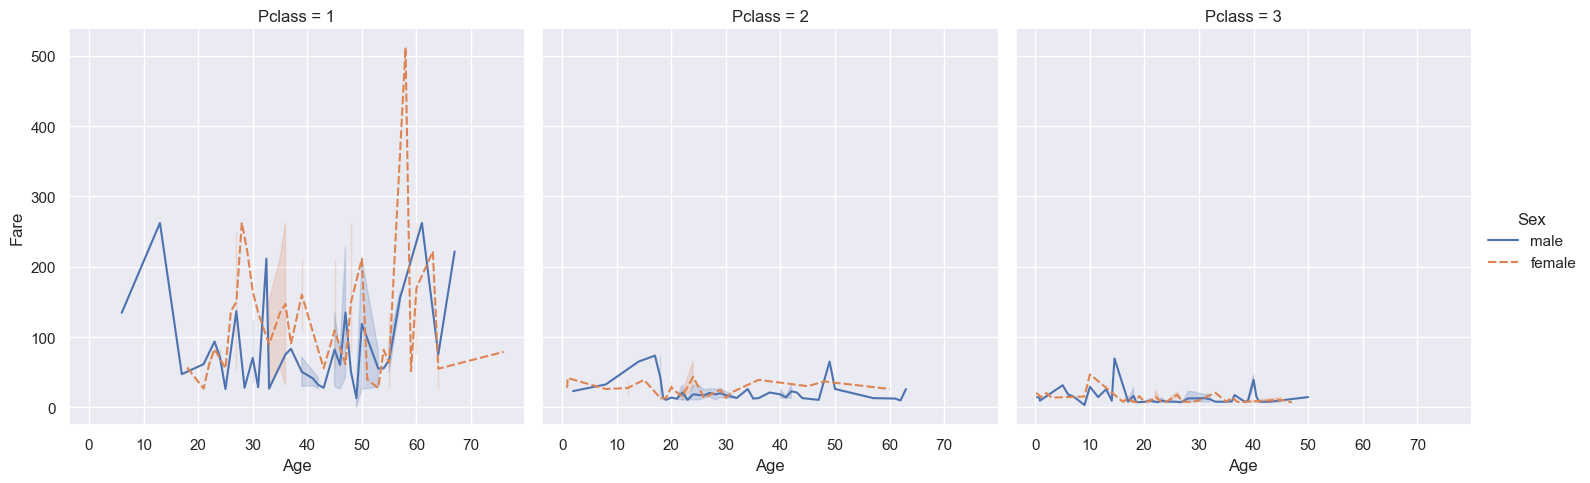

In [227]:
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex",kind="line", data=fd) 
# scatter can be used instead of "line" plot
plt.show()

### **Scatter Plot**

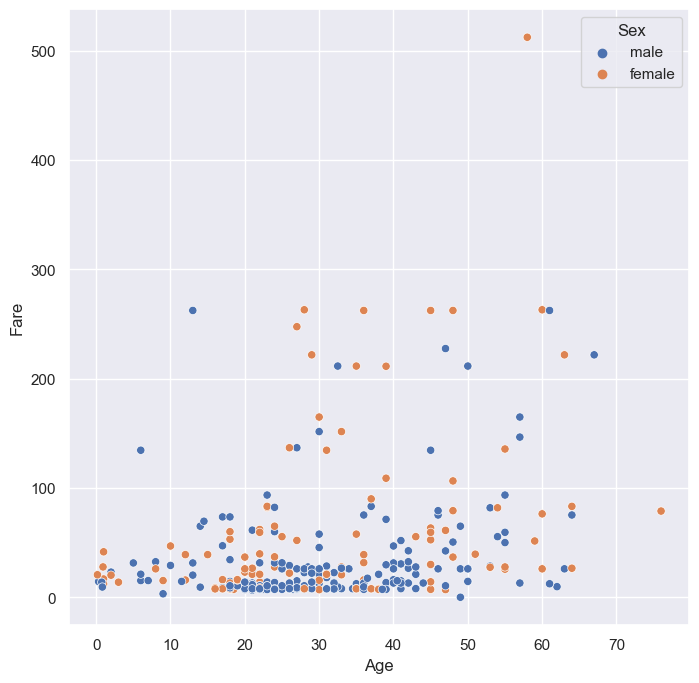

In [228]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=fd)
plt.show()

### **Line Plot**

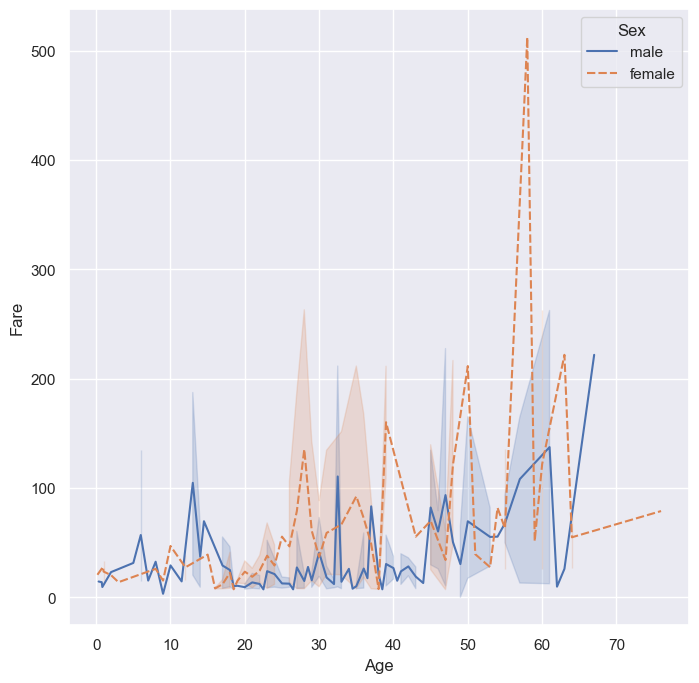

In [229]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=fd)
plt.show()

### **Box Plot**
 - **We have some outliers for passengers survery through their age.**

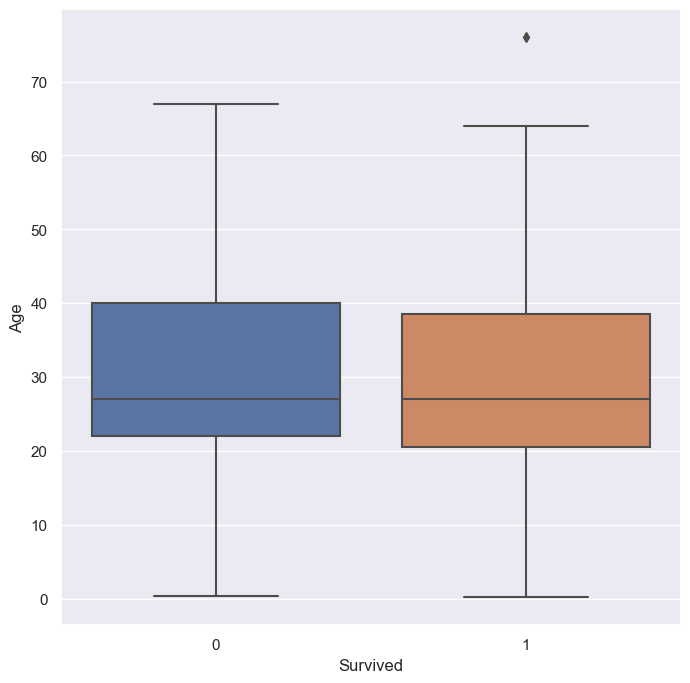

In [230]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", data=fd)
plt.show()

### **Now let's plot the correlation matrix of our data with a heatmap.**

C:\Users\irtiz\AppData\Local\Temp\ipykernel_9928\1735886200.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fd.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")


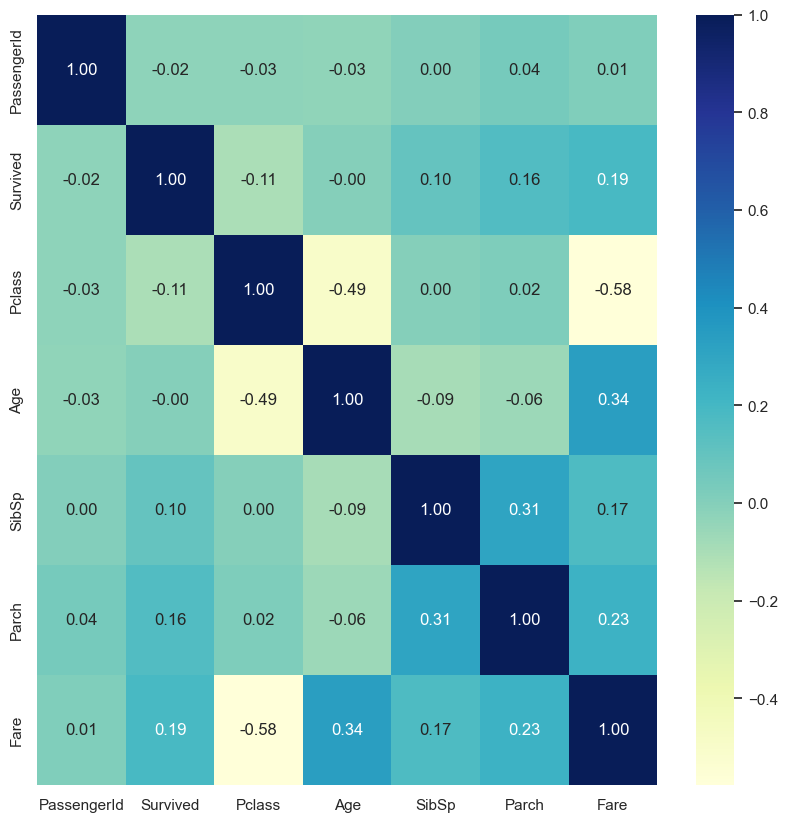

In [231]:
plt.subplots(figsize=(10, 10))
sns.heatmap(fd.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

### **FacetGrid.map**
 - The main approach for visualizing data on this grid is with the `FacetGrid.map()` method.

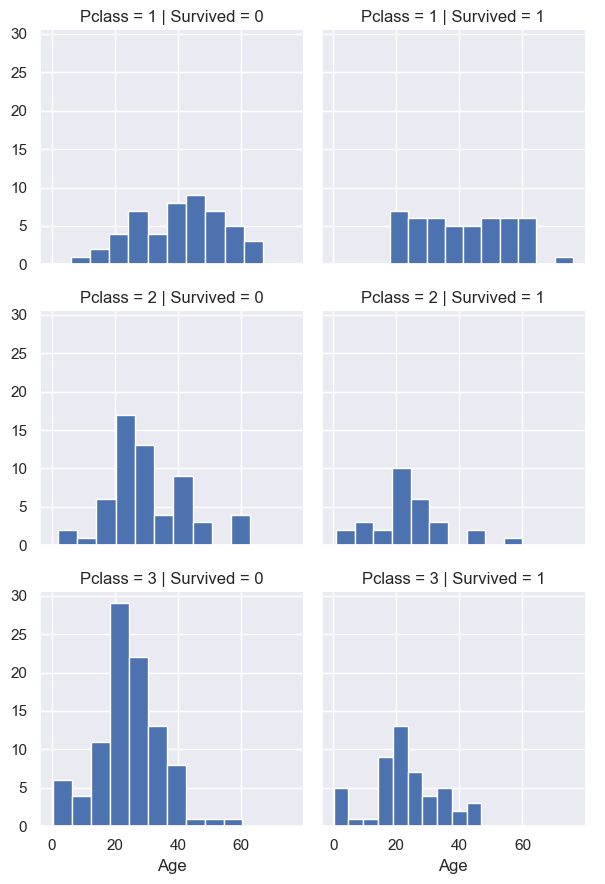

In [232]:
# initialize the FacetGrid object
g = sns.FacetGrid(fd, col='Survived', row='Pclass')

g.map(plt.hist, 'Age')
g.add_legend()
plt.show()

#### **Missing Value**

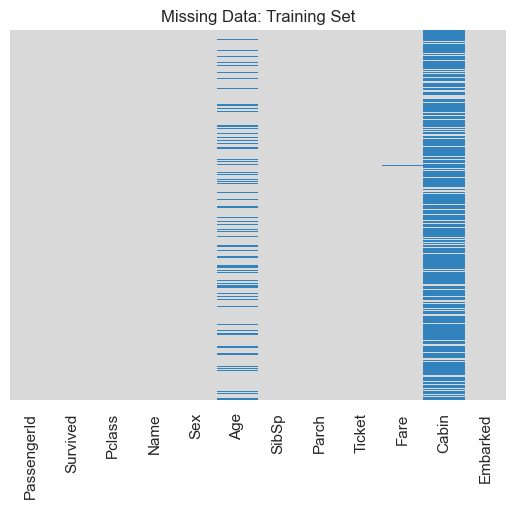

In [233]:
# Heatmap
sns.heatmap(fd.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [234]:
fd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### **Data Preprocessing**
 - **Handle missing values**
 - **Encode categorical variables**
 - **Feature engineering**

### **Remove unnecessary columns | Remove Cabin feature | Remove rows with missing data**

In [235]:
# Remove unnecessary columns
fd.drop(['Name','Ticket'], axis = 1, inplace = True)
fd.drop(['PassengerId','Parch'], axis = 1, inplace = True)
# Remove Cabin feature
fd.drop('Cabin', axis = 1, inplace = True)

# Remove rows with missing data
fd.dropna(inplace = True)

In [236]:
fd.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,34.5,0,7.8292,Q
1,1,3,female,47.0,1,7.0000,S
2,0,2,male,62.0,0,9.6875,Q
3,0,3,male,27.0,0,8.6625,S
4,1,3,female,22.0,1,12.2875,S


In [237]:
fd.shape

(331, 7)

### **Fill missing values in 'Age' and 'Embarked' with appropriate values**

In [238]:
# Fill missing values in 'Age' and 'Embarked' with appropriate values
fd['Age'].fillna(fd['Age'].mean(), inplace=True)
fd['Embarked'].fillna(fd['Embarked'].mode()[0], inplace=True)

In [239]:
fd.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,male,34.5,0,7.8292,Q
1,1,3,female,47.0,1,7.0000,S
2,0,2,male,62.0,0,9.6875,Q
3,0,3,male,27.0,0,8.6625,S
4,1,3,female,22.0,1,12.2875,S


### **Encode categorical variables 'Sex' and 'Embarked'**

In [240]:
# Encode categorical variables 'Sex' and 'Embarked'
fd = pd.get_dummies(fd, columns=['Sex', 'Embarked'], drop_first=True)

In [241]:
fd.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,7.8292,1,1,0
1,1,3,47.0,1,7.0000,0,0,1
2,0,2,62.0,0,9.6875,1,1,0
3,0,3,27.0,0,8.6625,1,0,1
4,1,3,22.0,1,12.2875,0,0,1


### **Identify categorical columns for one-hot encoding**

In [242]:
# Identify categorical columns for one-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder


categorical_cols = ['Sex', 'Embarked']

### **Identify numeric columns for scaling**

In [243]:
# Identify numeric columns for scaling
numeric_cols = [col for col in fd.columns if col not in categorical_cols and col != 'Survived']

### **Create transformers for preprocessing**

In [244]:
# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

### **Use ColumnTransformer to apply transformers to the appropriate columns**

In [245]:
# Use ColumnTransformer to apply transformers to the appropriate columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

### **Define the model**

In [246]:
# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

In [247]:
fd.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,34.5,0,7.8292,1,1,0
1,1,3,47.0,1,7.0000,0,0,1
2,0,2,62.0,0,9.6875,1,1,0
3,0,3,27.0,0,8.6625,1,0,1
4,1,3,22.0,1,12.2875,0,0,1


### **Split the data into training and testing sets**

In [248]:
# Split the data into training and testing sets
X = fd.drop(['Survived'], axis=1)
y = fd['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [249]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (264, 7)
Shape of y_train: (264,)
Shape of X_test: (67, 7)
Shape of y_test: (67,)


### **Train a Logistic Regression Model**

In [250]:
# Train a Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

c:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [251]:
# Make Predictions
y_pred = model.predict(X_test)

In [252]:
print(y_pred)
print(y_pred.shape)

[0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0]
(67,)


### **Evaluate the Model**

In [253]:

print('Classification Model')
# Accuracy
print('--'*30)
logreg_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Accuracy', logreg_accuracy,'%')

Classification Model
------------------------------------------------------------
Accuracy 100.0 %


In [254]:
from sklearn.metrics import classification_report, confusion_matrix


confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)


Confusion Matrix:
 [[45  0]
 [ 0 22]]


In [255]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67



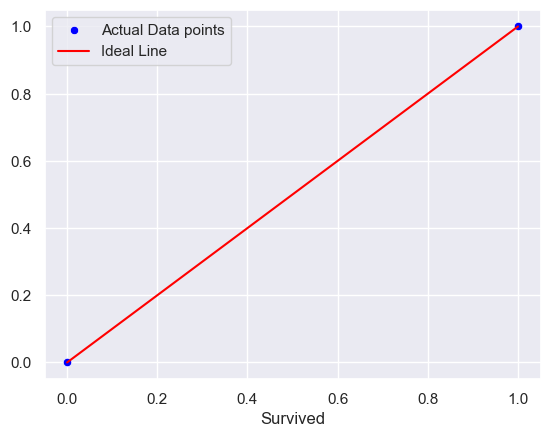

In [256]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [257]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
          0.00 |          0.00
          0.00 |          0.00
          0.00 |          0.00
          1.00 |          1.00
          0.00 |          0.00
          0.00 |          0.00
          1.00 |          1.00
          0.00 |          0.00
          0.00 |          0.00
          0.00 |          0.00
          1.00 |          1.00
          0.00 |          0.00
          0.00 |          0.00
          0.00 |          0.00
          0.00 |          0.00
          0.00 |          0.00
          0.00 |          0.00
          1.00 |          1.00
          0.00 |          0.00
          1.00 |          1.00
          0.00 |          0.00
          0.00 |          0.00
          1.00 |          1.00
          0.00 |          0.00
          0.00 |          0.00
          1.00 |          1.00
          0.00 |          0.00
          1.00 |          1.00
          1.00 |          1.00
          1.00 |          1.00
     